# broken y-axis graph



##  한국어 폰트 설치



In [1]:
# Colab 전용 나눔글꼴 설치 코드
!apt install fonts-nanum

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


## 라이브러리 설치

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
import matplotlib.font_manager as fm

## 폰트 이름 찾기

이름에 `Nanum`이 포함된 글꼴 찾기

In [3]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[('NanumMyeongjo', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'),
 ('NanumGothic', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'),
 ('NanumSquare', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'),
 ('NanumBarunGothic',
  '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf'),
 ('NanumSquareRound', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf'),
 ('NanumSquare', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf'),
 ('NanumSquareRound', '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf'),
 ('NanumGothic', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'),
 ('NanumMyeongjo', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'),
 ('NanumBarunGothic', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')]

In [4]:
sns.set(font="NanumSquareB", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

In [5]:
font_file_path_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

font_path = '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name
plt.rcParams['font.size'] = 20

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False

## 그래프 그리기

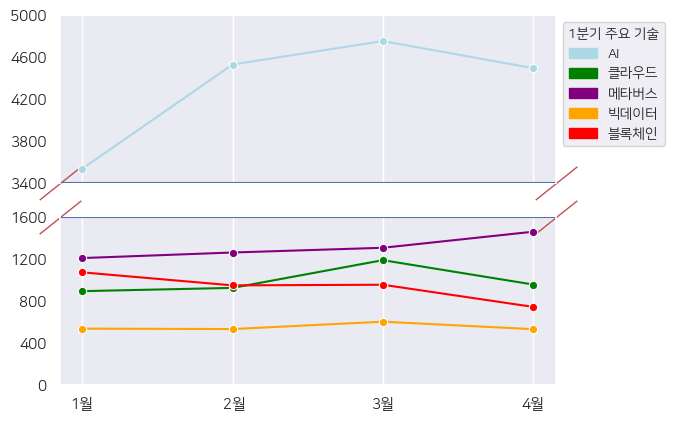

In [29]:
from matplotlib.patches import Rectangle

f, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True)
d = .8    # how big to make the diagonal lines in axes coordinates

kwargs = dict(marker=[(-1, -d), (1, d)], markersize=30, linestyle="none", color='r', clip_on=False)

ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax1.plot([0, 1], [0, 0], transform=ax1.transAxes)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes)

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax1.yaxis.grid()
ax2.yaxis.grid()

ax1.set_ylim(3399, 5000)
ax2.set_ylim(0, 1600)

ax1.set_yticks([3400, 3800, 4200, 4600, 5000])
ax2.set_yticks([0, 400, 800, 1200, 1600])

# 데이터 값
x_values = ["1월", " 2월", "3월", "4월"]
y_values_1 = [892, 923, 1187, 955] #빅데이터
y_values_2 = [1207, 1260, 1305, 1458] #클라우드
y_values_3 = [535, 531, 601, 530] #블록체인
y_values_4 = [1071, 947, 953, 742] #메타버스
y_values_5 = [3537, 4530, 4754, 4495] #AI

# line plot 그리기
ax1 = sns.lineplot(x=x_values, y=y_values_5, linestyle='-', marker='o', ax=ax1, color="lightblue")
ax2 = sns.lineplot(x=x_values, y=y_values_1, linestyle='-', marker='o', color="green")
ax2 = sns.lineplot(x=x_values, y=y_values_2, linestyle='-', marker='o', color="purple")
ax2 = sns.lineplot(x=x_values, y=y_values_3, linestyle='-', marker='o', color="orange" )
ax2 = sns.lineplot(x=x_values, y=y_values_4, linestyle='-', marker='o', color="red")

# 범례
# ax1.get_legend().remove()
# ax2.get_legend().remove()
ax1.legend(
    title = "1분기 주요 기술",
    handles=[
      Rectangle((0,0), 0, 0, color = "lightblue", alpha = 1, label="AI"),
      Rectangle((0,0), 0, 0, color = "green", alpha = 1, label="클라우드"),
      Rectangle((0,0), 0, 0, color = "purple", alpha = 1, label="메타버스"),
      Rectangle((0,0), 0, 0, color = "orange", alpha = 1, label="빅데이터"),
      Rectangle((0,0), 0, 0, color = "red", alpha = 1, label="블록체인")
  ],
    # loc = "upper right",
  #  bbox_to_anchor= (0, 0, 40, 1, 0),
    bbox_to_anchor = (1,1),
    ncol = 1,
    fontsize = "10",
    title_fontsize = "10"
)

plt.show()

# 더 해볼 만한 것
그래프(x축, y축, 범례)를 데이터프레임을 만들어서 참조하는 형태가 아니라 일일이  그렸기 때문에 데이터 기반이라든지, 자동화라는 느낌이 들지 않는다.

이런 경우 데이터가 많이 늘어나거나 변동이 생길 때 일일이 찾아서 고치기 어렵겠다는 생각이 든다.

필요한 그래프 요소들을 데이터프레임에서 참조하여 그릴 수 있다면 틀만 만들어놓고 재사용할 수 있는 함수 코드를 만들 수 있을 것이다.

그리고 barplot 그래프의 범례 코드를 참고하느라 불필요하게 Rectangle 함수를 썼으므로 이 부분도 함수화시키는 과정에서 기본 범례를 사용하면 개선할 수 있을 것이다.

남는 시간에 차차 추가해볼 것!

```python
# colname:x, rowname:y ... / df[0]:x, df[1:]:y ...etc.
x_names = ['1월', '2월', '3월', '4월']
freq_df= df.groupby('x_names')[???]
ax1.legend(
    title="1분기 주요 기술"
    handles=[
        
    ]
)
```

## 참고 사이트
- 파이썬 y축 중간 생략 그래프 (broken yaxis) 그리기 - 공부하는 도비 https://yang-wistory1009.tistory.com/144
- matplotlib 꺾은 선 그래프 그리기 https://hleecaster.com/python-matplotlib-line-graph/
- [Seaborn] 1. 선 그래프(라인 차트, Line Chart) 그리기 (feat.lineplot) https://zephyrus1111.tistory.com/248
- Seaborn 플롯에서 범례 위치 변경 https://www.delftstack.com/ko/howto/seaborn/seaborn-legend-position/
- Matplotlib 다양한 도형 삽입하기 https://codetorial.net/matplotlib/module_patches.html (여기선 안써도 됨)